[[-0.2970288  -0.29796147 -0.29889421 ... -0.38792215 -0.38886425
  -0.38980647]
 [-0.29885362 -0.29978563 -0.30071771 ... -0.38967108 -0.39061225
  -0.39155352]
 [-0.30068347 -0.30161484 -0.30254629 ... -0.39142714 -0.3923674
  -0.39330776]
 ...
 [-0.48632544 -0.48723581 -0.48814618 ... -0.57465418 -0.57556505
  -0.57647594]
 [-0.48833405 -0.48924437 -0.4901547  ... -0.57665818 -0.577569
  -0.57847983]
 [-0.490343   -0.49125329 -0.49216359 ... -0.57866268 -0.57957344
  -0.58048422]]
[[-1.03699371 -1.03713751 -1.0372819  ... -1.0540523  -1.05426589
  -1.05448037]
 [-1.03558696 -1.03572511 -1.03586381 ... -1.05196436 -1.05216929
  -1.05237507]
 [-1.03423547 -1.03436819 -1.03450146 ... -1.0499609  -1.05015755
  -1.05035502]
 ...
 [-1.00094789 -1.00095145 -1.00095502 ... -1.00136314 -1.00136826
  -1.00137339]
 [-1.00091306 -1.00091648 -1.00091992 ... -1.00131302 -1.00131795
  -1.00132289]
 [-1.0008795  -1.0008828  -1.00088611 ... -1.00126474 -1.00126949
  -1.00127426]]


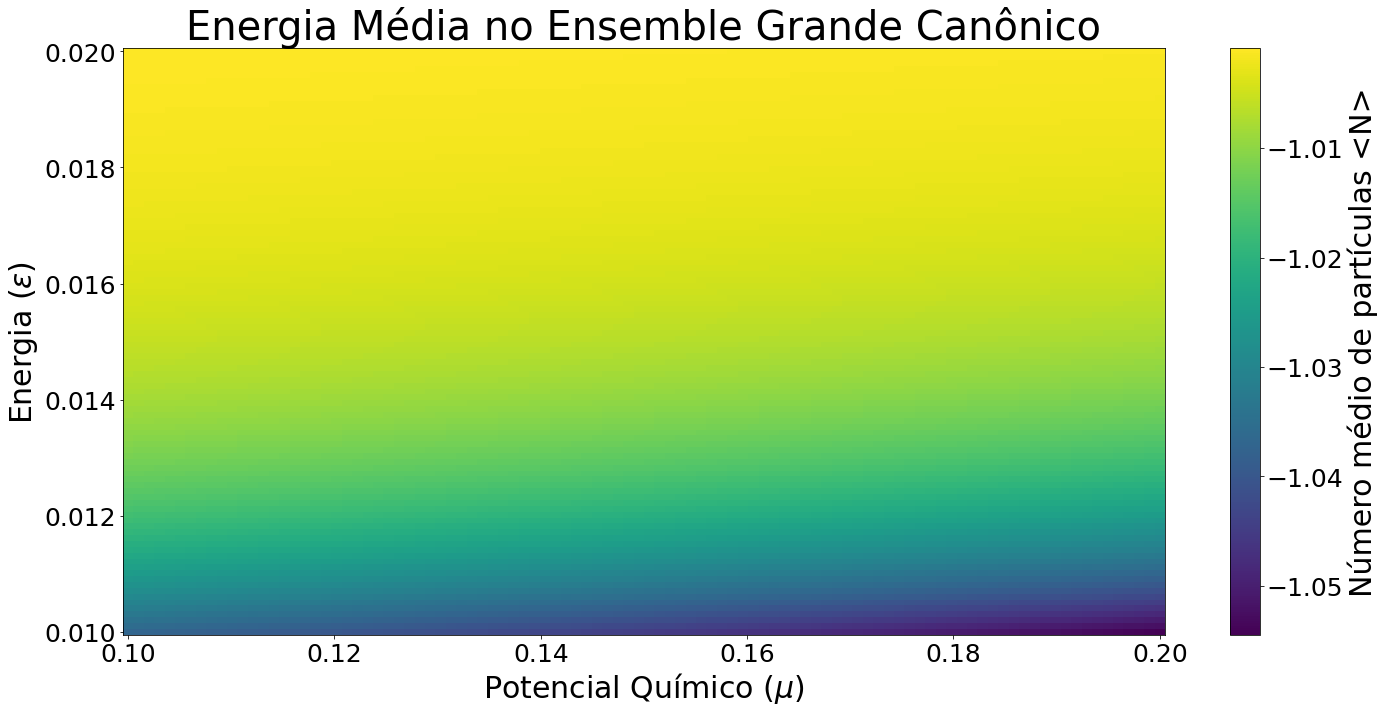

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo as constantes
k_B = 1.0  # Constante de Boltzmann
T = 0.027 #0.025# Temperatura em eV
n_c = 10  # Número crítico de partículas
mu_values = np.linspace(0.1, 0.2, 100) #np.linspace(0.01, 0.02, 100)  # Valores do potencial químico
epsilon_values = np.linspace(0.01, 0.02, 100) #np.linspace(0.1, 0.2, 100)  # Valores de energia do sistema

# Calculando o fator beta
beta = 1.0 / (k_B * T)

# Inicializando arrays para armazenar os resultados
energy_matrix = np.zeros((len(mu_values), len(epsilon_values)))
particle_number_matrix = np.zeros((len(mu_values), len(epsilon_values)))

# Calculando a função de partição, energia média e número médio de partículas para diferentes valores de mu e epsilon
for i, mu in enumerate(mu_values):
    for j, epsilon in enumerate(epsilon_values):
        partition_function = np.exp(beta * epsilon * n_c) / (1 - np.exp(-beta * (epsilon - mu)))
        energy_matrix[i,j] = -(epsilon*n_c) - ((epsilon-mu) * np.exp(-beta*(epsilon-mu))/(1-np.exp(-beta*(epsilon - mu))))+((mu/beta)*((beta*np.exp(-beta*(epsilon-mu)))/(1-np.exp(-beta*(epsilon-mu)))))
        #energy_matrix[i, j] = -1 / beta * np.log(partition_function) + mu / beta * (1 - np.exp(beta * (epsilon - mu))) / (1 - np.exp(-beta * (epsilon - mu)))
        #particle_number_matrix[i, j] = 1 / beta * (1 - np.exp(beta * (epsilon - mu))) / (1 - np.exp(-beta * (epsilon - mu)))
        particle_number_matrix[i,j] = (1/beta) * ((beta*np.exp(-beta*(epsilon-mu)))/(1-np.exp(-beta*(epsilon-mu))))
        
print(energy_matrix)
print(particle_number_matrix)

# Criando o gráfico de color map para a energia média
plt.figure(figsize=(20, 10))
graph = plt.pcolormesh(mu_values, epsilon_values, particle_number_matrix, shading='auto', cmap='viridis')
colorbar = plt.colorbar(graph, shrink=1)
colorbar.set_label('Número médio de partículas <N>', fontsize=30)
plt.xlabel('Potencial Químico ($\mu$)', size=30)
plt.ylabel('Energia ($\epsilon$)', size=30)
plt.title('Energia Média no Ensemble Grande Canônico', size=40)

colorbar.ax.tick_params(labelsize=25)
plt.rcParams['legend.fontsize'] = 25
plt.tick_params(labelsize=25)

plt.tight_layout()
#plt.savefig("Ensemble com energia maior que potencial.png")
plt.savefig("Ensemble com energia menor que potencial.png")

plt.show()

[[-0.2970288  -0.29796147 -0.29889421 ... -0.38792215 -0.38886425
  -0.38980647]
 [-0.29885362 -0.29978563 -0.30071771 ... -0.38967108 -0.39061225
  -0.39155352]
 [-0.30068347 -0.30161484 -0.30254629 ... -0.39142714 -0.3923674
  -0.39330776]
 ...
 [-0.48632544 -0.48723581 -0.48814618 ... -0.57465418 -0.57556505
  -0.57647594]
 [-0.48833405 -0.48924437 -0.4901547  ... -0.57665818 -0.577569
  -0.57847983]
 [-0.490343   -0.49125329 -0.49216359 ... -0.57866268 -0.57957344
  -0.58048422]]
[[-1.03699371 -1.03713751 -1.0372819  ... -1.0540523  -1.05426589
  -1.05448037]
 [-1.03558696 -1.03572511 -1.03586381 ... -1.05196436 -1.05216929
  -1.05237507]
 [-1.03423547 -1.03436819 -1.03450146 ... -1.0499609  -1.05015755
  -1.05035502]
 ...
 [-1.00094789 -1.00095145 -1.00095502 ... -1.00136314 -1.00136826
  -1.00137339]
 [-1.00091306 -1.00091648 -1.00091992 ... -1.00131302 -1.00131795
  -1.00132289]
 [-1.0008795  -1.0008828  -1.00088611 ... -1.00126474 -1.00126949
  -1.00127426]]


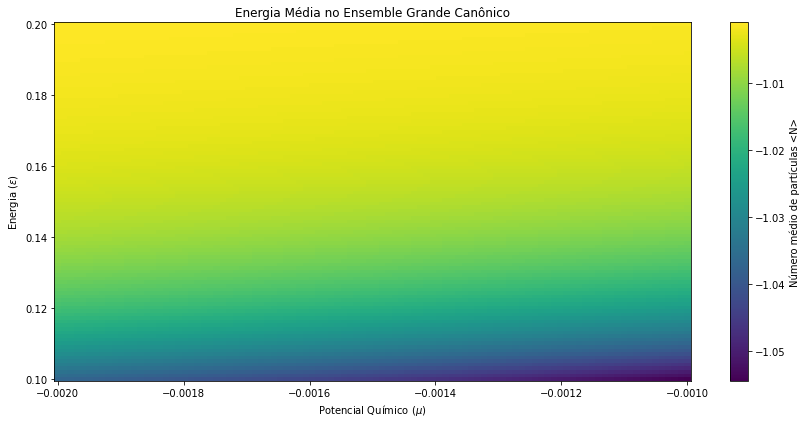

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo as constantes
k_B = 1.0  # Constante de Boltzmann
T = 300.0  # Temperatura em Kelvin
n_c = 100  # Número crítico de partículas
mu_values = np.linspace(-0.002, -0.001, 100)  # Valores do potencial químico
epsilon_values = np.linspace(0.1, 0.2, 100)  # Valores de energia do sistema

# Calculando o fator beta
beta = 1.0 / (k_B * T)

energy_list = []
particle_number_list = []

# Calculando a função de partição, energia média e número médio de partículas para diferentes valores de mu e epsilon
for i in range(len(mu_values)):
    for j in range(len(epsilon_values)):
        partition_function = np.exp(beta * epsilon_values[j] * n_c) / (1 - np.exp(-beta * (epsilon_values - mu_values[i])))
        energy = -(epsilon_values[j]*n_c) - ((epsilon_values[j]-mu_values[i]) * np.exp(-beta*(epsilon_values[j]-mu_values[i]))/(1-np.exp(-beta*(epsilon_values[j] - mu_values[i]))))+((mu_values[i]/beta)*((beta*np.exp(-beta*(epsilon_values[j]-mu_values[i])))/(1-np.exp(-beta*(epsilon_values[j]-mu_values[i])))))
        #energy_matrix[i, j] = -1 / beta * np.log(partition_function) + mu / beta * (1 - np.exp(beta * (epsilon - mu))) / (1 - np.exp(-beta * (epsilon - mu)))
        #particle_number_matrix[i, j] = 1 / beta * (1 - np.exp(beta * (epsilon - mu))) / (1 - np.exp(-beta * (epsilon - mu)))
        particle = (1/beta) * ((beta*np.exp(-beta*(epsilon_values[j]-mu_values[i])))/(1-np.exp(-beta*(epsilon_values[j]-mu_values[i]))))
        energy_list.append(energy)
        particle_number_list.append(particle)
        
print(energy_matrix)
print(particle_number_matrix)

# Criando o gráfico de color map para a energia média
plt.figure(figsize=(12, 6))
plt.pcolormesh(mu_values, epsilon_values, particle_number_matrix, shading='auto', cmap='viridis')
plt.colorbar(label='Número médio de partículas <N>')
plt.xlabel('Potencial Químico ($\mu$)')
plt.ylabel('Energia ($\epsilon$)')
plt.title('Energia Média no Ensemble Grande Canônico')

plt.tight_layout()
plt.show()